In [1]:
#liebraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,OneHotEncoder ,LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report ,precision_score, recall_score, f1_score ,confusion_matrix
from scipy import stats
from imblearn.over_sampling import SMOTE

# Data collection and exploration

In [3]:
# Data collection
df = pd.DataFrame(pd.read_csv('creditcard.csv'))
print(df.head())

# data Exploration
print(f'shape : \n {df.shape}\n')
print(f'information : \n {df.info()}\n')
print(f'Describe : \n {df.describe()}\n')

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# data cleaning

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print(f'Dupicates before cleaning : {df.duplicated().sum()}')

Dupicates before cleaning : 1081


In [7]:
df = df.drop_duplicates()
print(f'Dupicates after cleaning : {df.duplicated().sum()}')

Dupicates after cleaning : 0


In [8]:
# outliayers 
num_cols = np.array(['V1','V2', 'V3',	'V4'	,'V5',	'V6'	,'V7'	,'V8', 'V9' ,'V10', 'V11' ,'V12' ,'V13' ,'V14' ,'V15' ,'V16' ,'V17' ,'V18' ,'V19','V20'  ,'V21' , 'V22',	'V23' ,'V24'	,'V25',	'V26',	'V27'	,'V28'	,'Amount'])

for cols in num_cols:
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    IQR = q3 -q1
    lower_bound = q1 - 1.5 *IQR
    upper_bound = q3 + 1.5 *IQR
    outlayers = df[(df[cols] < lower_bound) | (df[cols] > upper_bound)]
    print(f'outlayers in {cols}')
    print(outlayers)
    # Apply lambda to replace outliers with NaN
    df[cols] = df[cols].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)

print(df.head())


outlayers in V1
            Time         V1         V2        V3        V4        V5  \
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
85          55.0  -4.575093  -4.429184  3.402585  0.903915  3.002224   
140         87.0  -5.101877   1.897022 -3.458034 -1.277543 -5.517758   
146         92.0  -5.285971   4.847323 -1.290368 -1.427842 -0.621533   
164        103.0  -6.093248 -12.114213 -5.694973  3.294389 -1.413792   
...          ...        ...        ...       ...       ...       ...   
284631  172623.0  -5.459612   4.844512 -5.127471 -0.772816 -2.098147   
284649  172642.0 -11.946976   9.772660 -8.006237 -2.498596 -4.229520   
284772  172760.0  -6.713826   2.369104 -3.534768 -0.368259 -1.721030   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   

              V6        V7        V8        V9  ...       V21       V22  \
18     -1.763406 -1.559738  0.160842  1.2330

In [9]:
print(f'null values after outlayers handlued : \n {df.isnull().sum()}')
df = df.fillna(df.mean())

null values after outlayers handlued : 
 Time          0
V1         6948
V2        13390
V3         3306
V4        11094
V5        12221
V6        22886
V7         8839
V8        23904
V9         8199
V10        9345
V11         735
V12       15282
V13        3362
V14       14060
V15        2884
V16        8180
V17        7353
V18        7468
V19       10150
V20       27553
V21       14401
V22        1298
V23       18467
V24        4758
V25        5333
V26        5665
V27       38799
V28       30094
Amount    31685
Class         0
dtype: int64


In [10]:
print(f'null values after handling by fillna methode: \n {df.isnull().sum()}')

null values after handling by fillna methode: 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
df.to_csv('cleaned_df.csv')

# data preprocessing and EDA

In [13]:
df['Class'].info()
df['Class'].describe()
df.shape

<class 'pandas.core.series.Series'>
Index: 283726 entries, 0 to 284806
Series name: Class
Non-Null Count   Dtype
--------------   -----
283726 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


(283726, 31)

<Figure size 640x480 with 0 Axes>

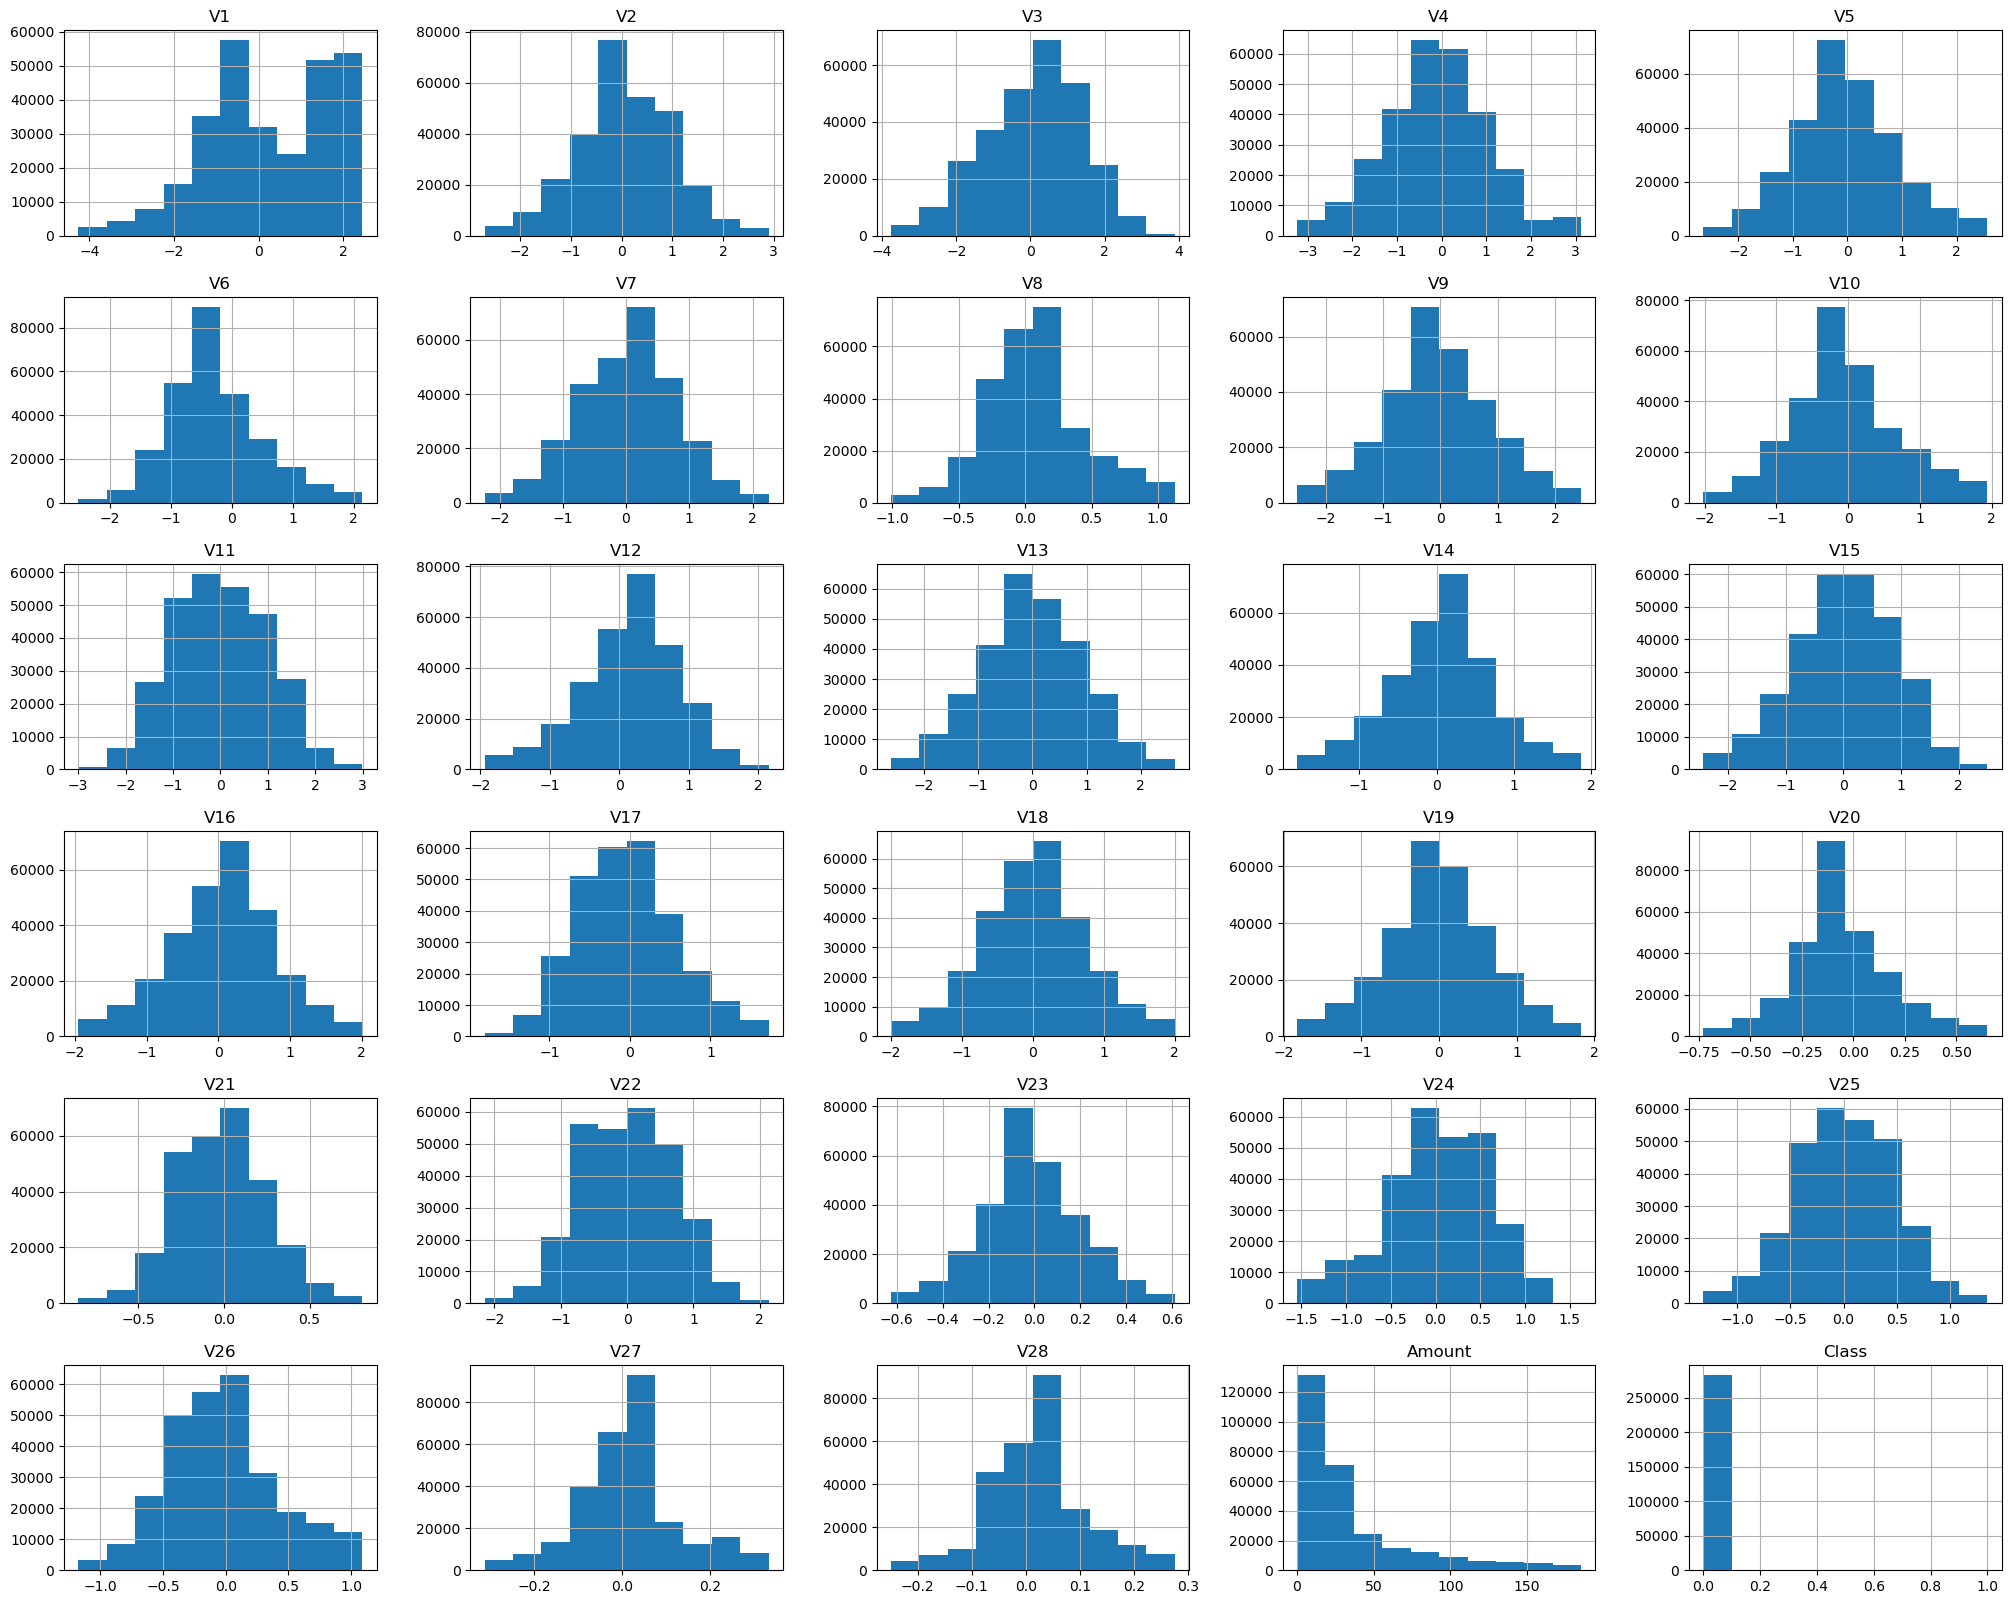

In [14]:
plt.figure()
cols1 = ['Amount','Class']
cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
df[cols].hist(figsize = (25,20))

plt.show()

Class
0    283253
1       473
Name: count, dtype: int64


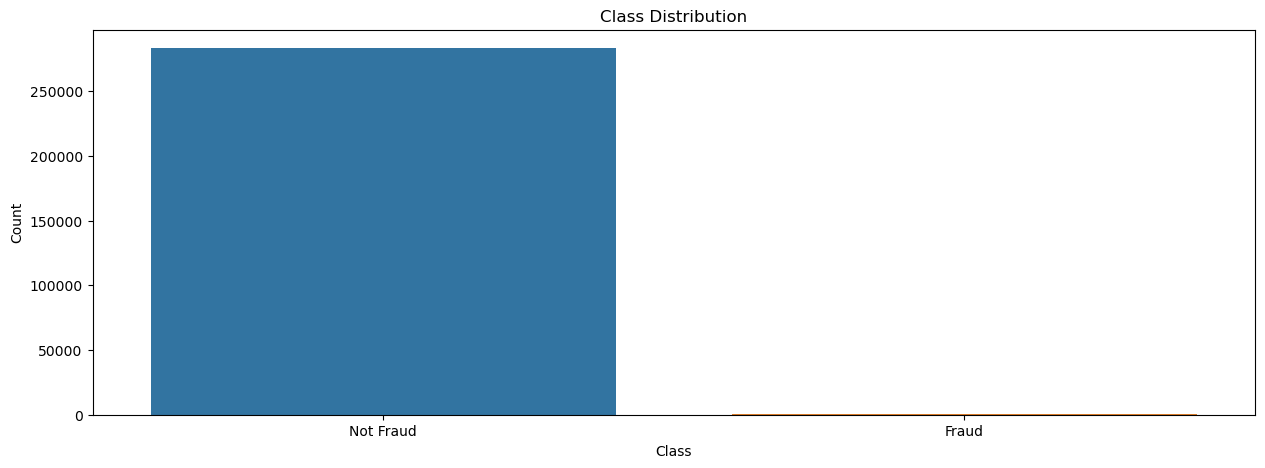

In [15]:
class_dist = df['Class'].value_counts()
print(class_dist)

plt.figure(figsize = (15,5))
sns.countplot(x= 'Class' ,data =df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.title('Class Distribution')
plt.show()

C:\Users\Shivmalhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


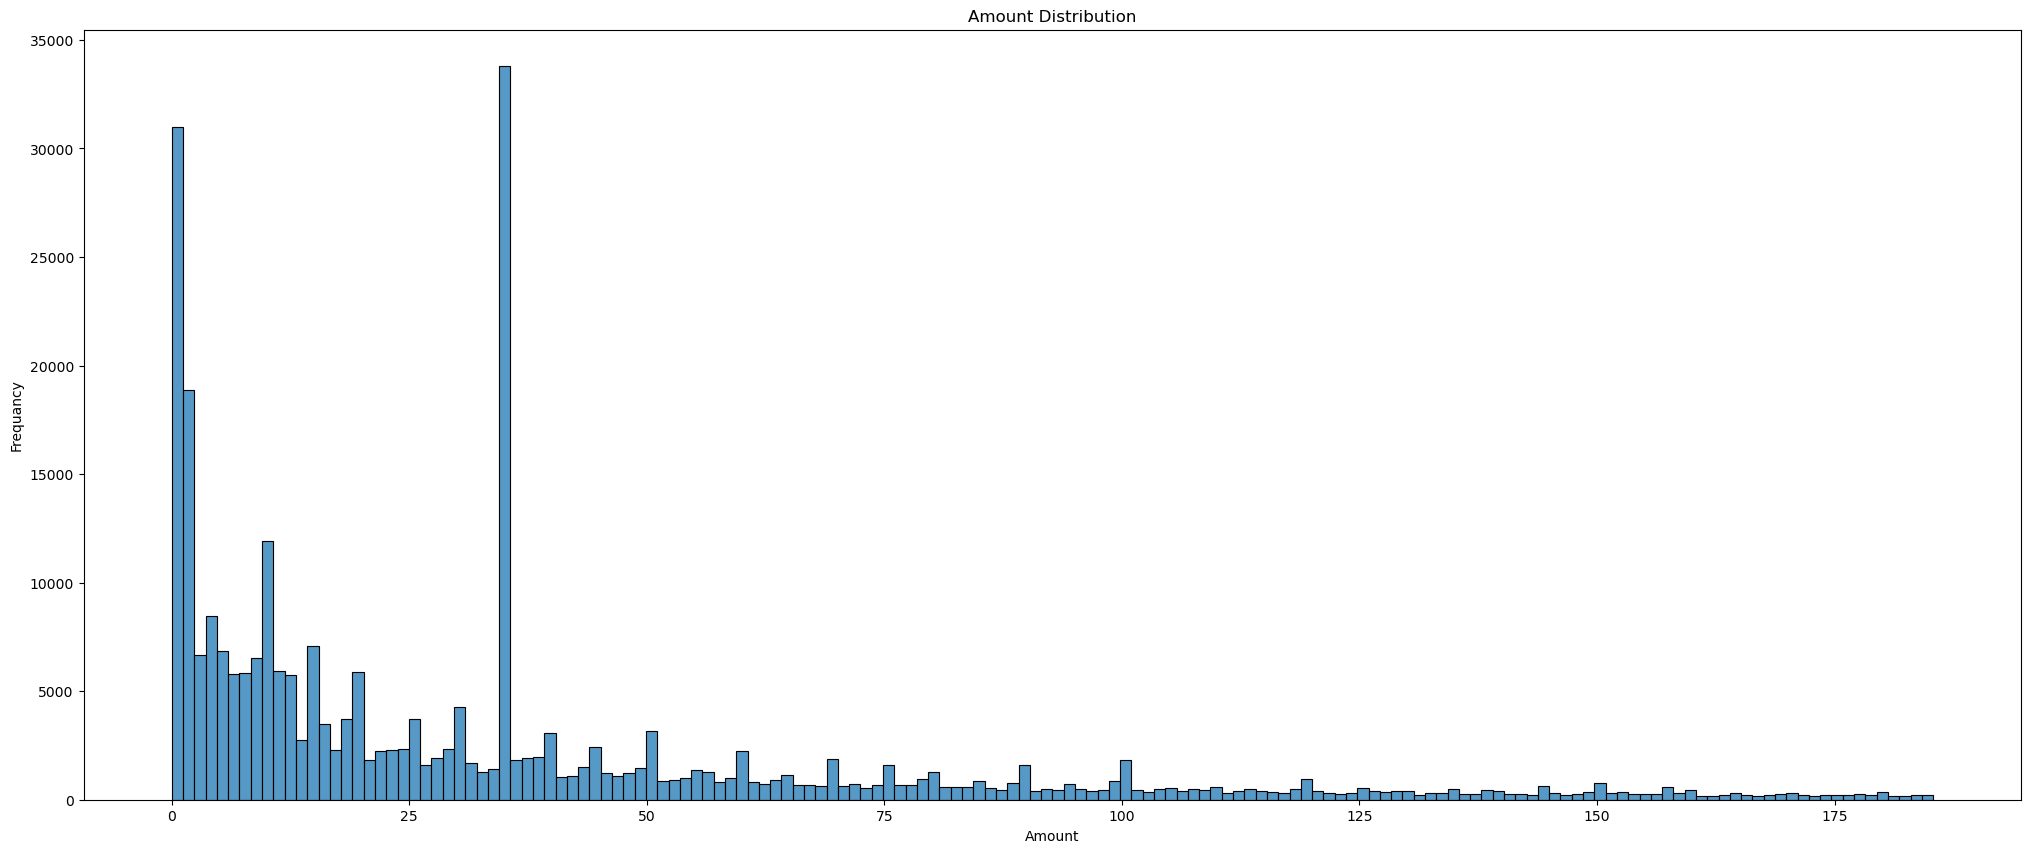

In [16]:
plt.figure(figsize = (25,10))
sns.histplot(df['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequancy')
plt.title('Amount Distribution')
plt.show()

C:\Users\Shivmalhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


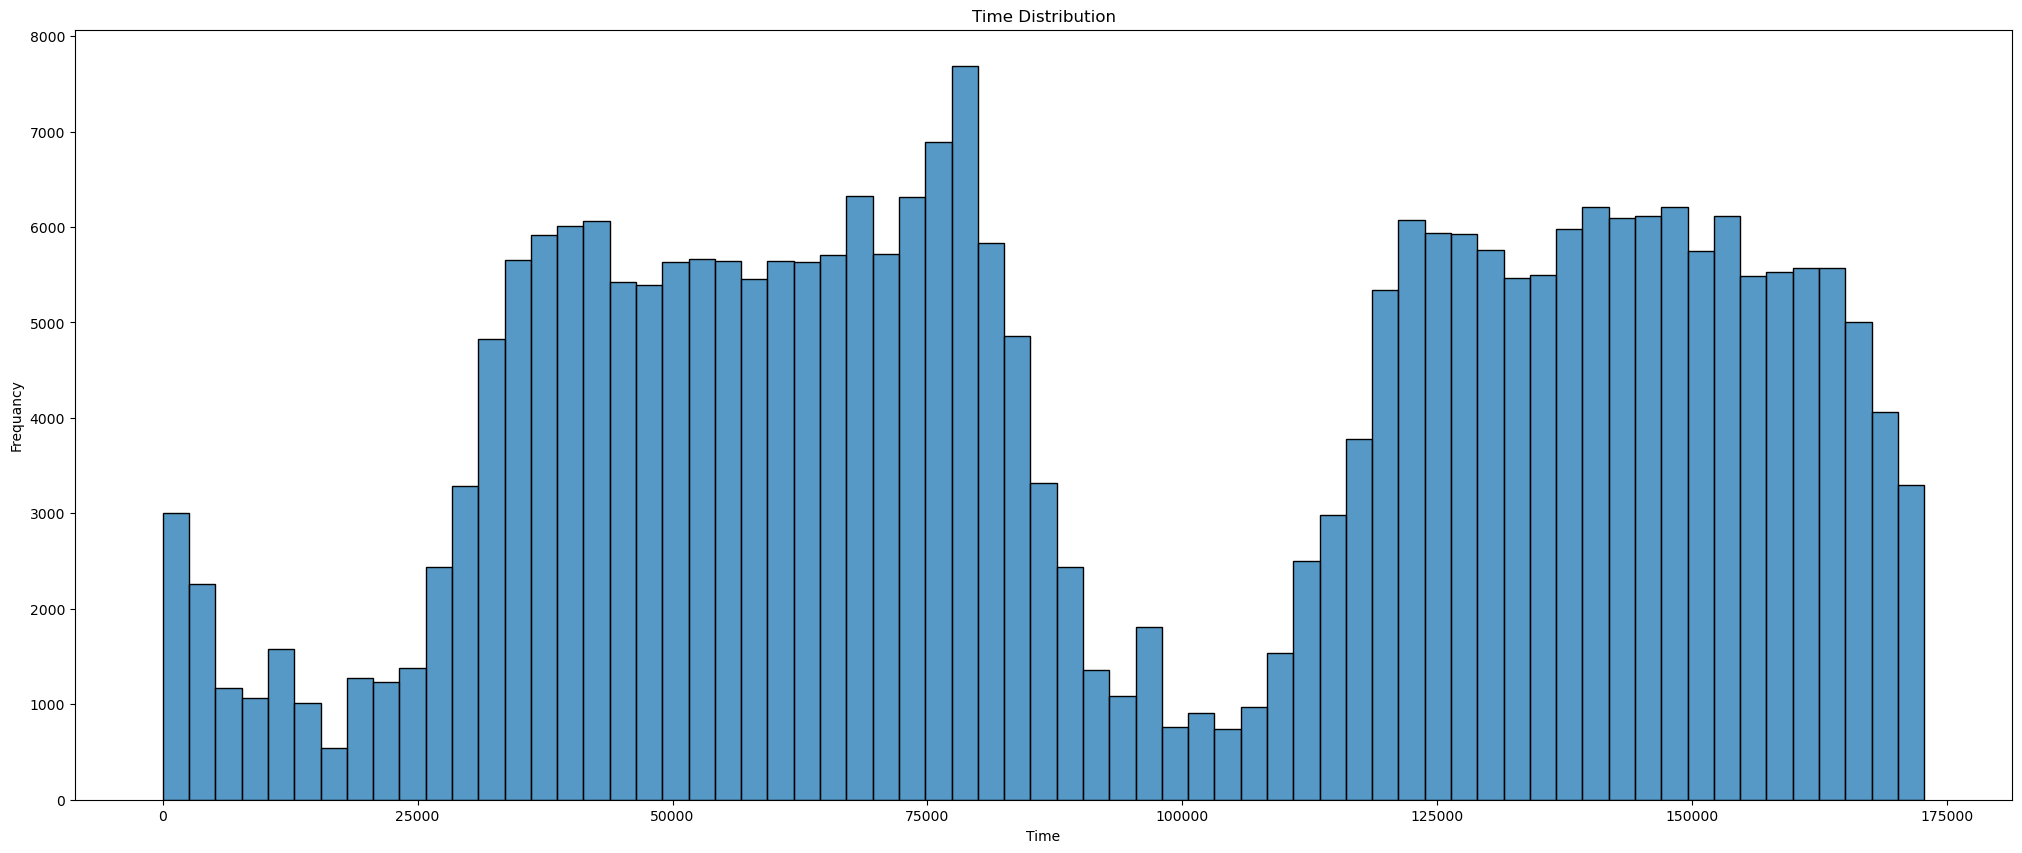

In [17]:
plt.figure(figsize = (25,10))
sns.histplot(df['Time'])
plt.xlabel('Time')
plt.ylabel('Frequancy')
plt.title('Time Distribution')
plt.show()

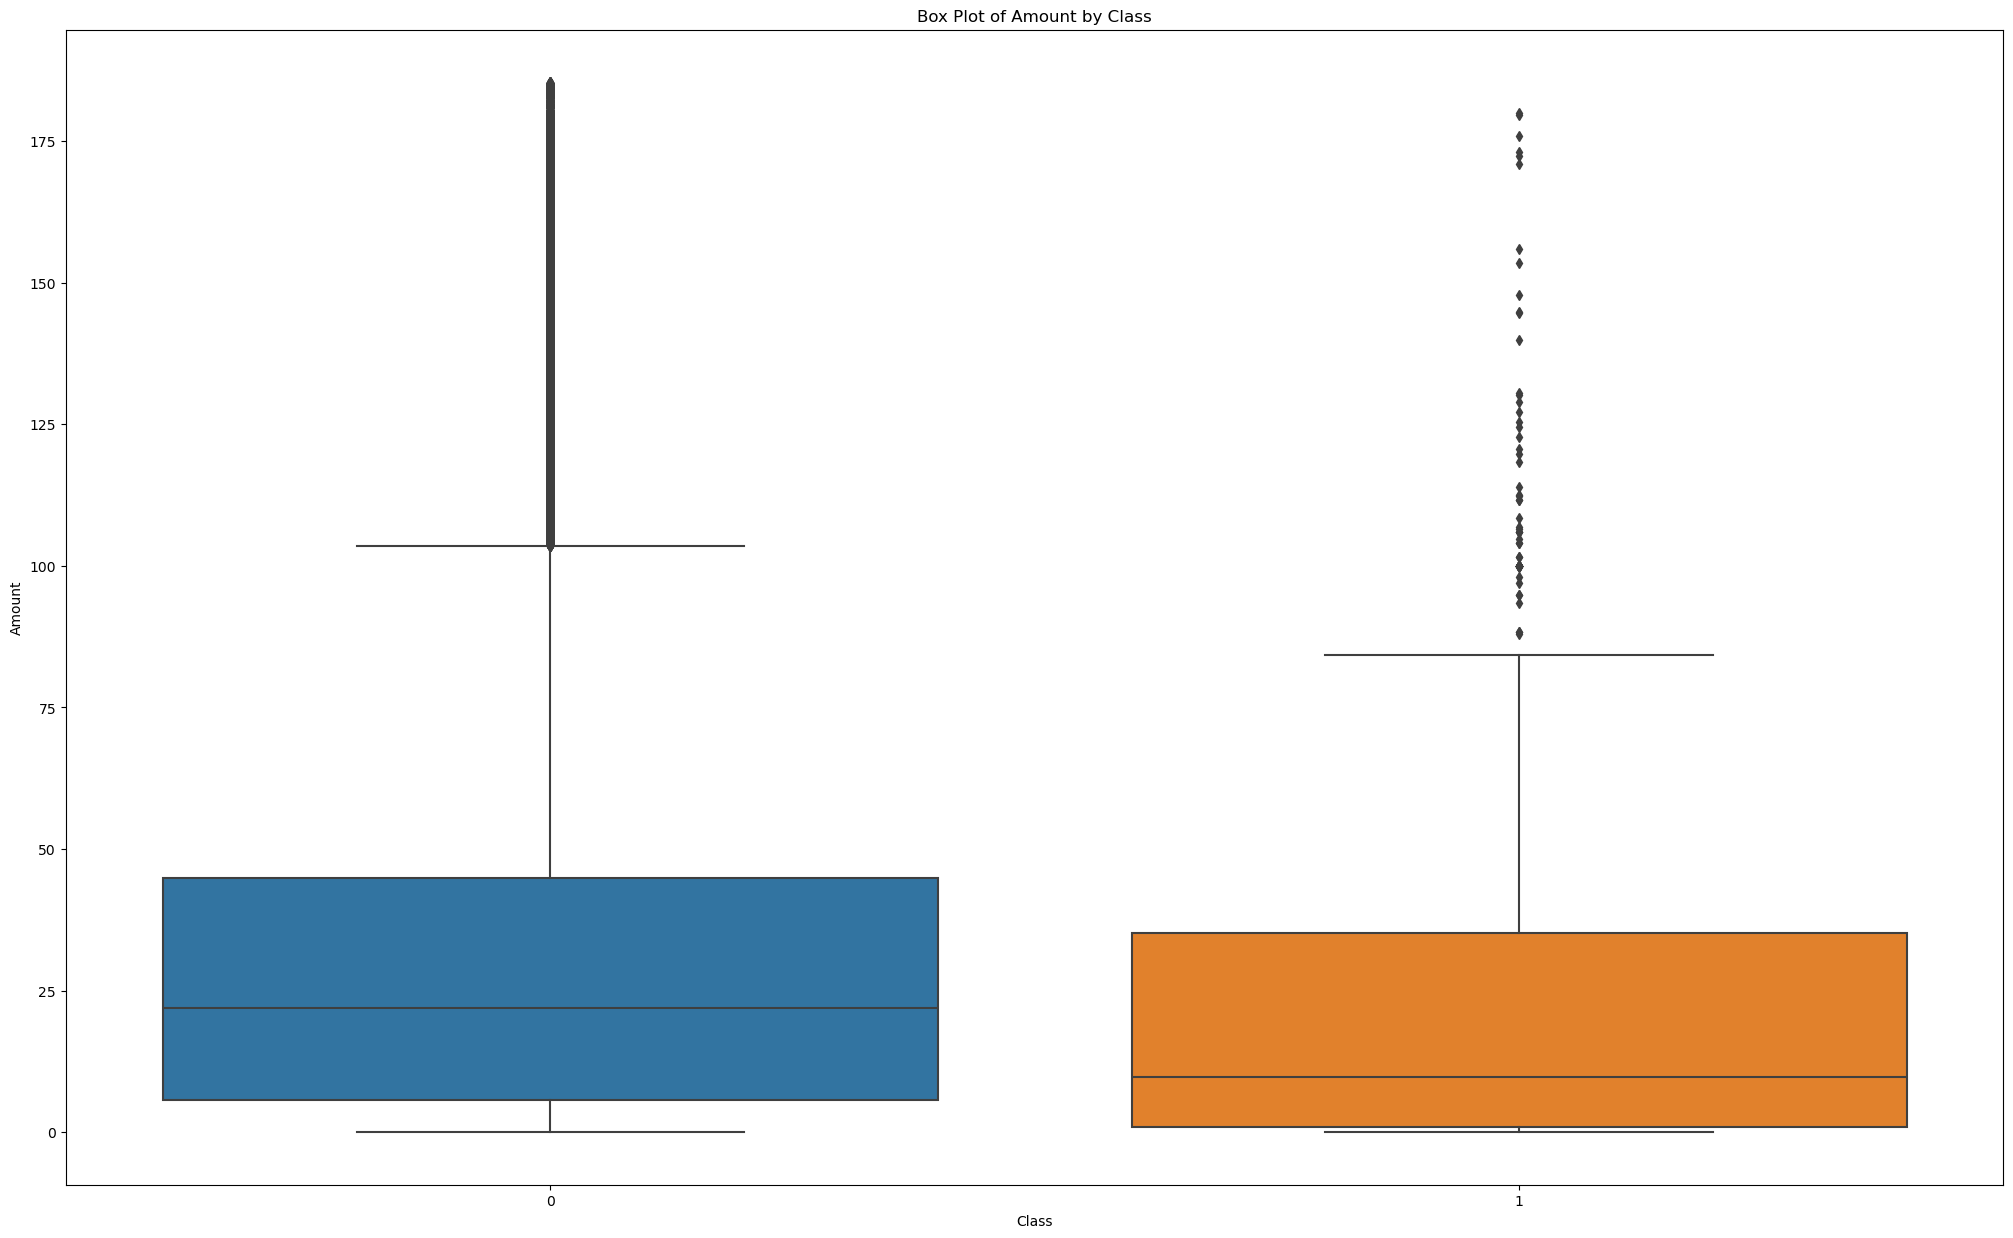

In [18]:
plt.figure(figsize =(25,15))
sns.boxplot(x = 'Class', y = 'Amount',data = df)
plt.title('Box Plot of Amount by Class')
plt.show()

In [19]:
X = df.drop('Class',axis = 1)
y = df['Class']
X_train ,X_test ,y_train ,y_test = train_test_split(X, y ,test_size = 0.2 ,random_state = 42)

In [20]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Model building

In [22]:
# Model training
model =LogisticRegression(class_weight = 'balanced')
model.fit(X_train,y_train)

# # Predictions
y_pred = model.predict(X_test)

# # Evaluation metrics
accuracy = accuracy_score(y_test ,y_pred)
classification_report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test ,y_pred)

print(f'Accuracy score : {accuracy}')
print(f'classification_report :\n {classification_report}')
print(f'confusion matrix :\n {cm}')

Accuracy score : 0.998413985126705
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746

confusion matrix :
 [[56656     0]
 [   90     0]]


C:\Users\Shivmalhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivmalhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shivmalhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
